In [1]:
# IMPORT LIBRARIES
from scipy.io import arff
import pandas as pd

# DOWNLOAD THE DATASET AND PERFORM CLEANING
data = arff.loadarff('EEG Eye State.arff')
df = pd.DataFrame(data[0])
df['eyeDetection'] = df['eyeDetection'].replace({b'0': 0, b'1': 1})
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [2]:
# SEE STATS FOR EACH CHANNEL
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


We can see there are some outliers for each channel, looking at the mins and maxs compared to the averages.

In [3]:
## REMOVE OUTLIERS
## -- OUTLLIER = OVER 3 STANDARD DEVIATIONS AWAY FROM THE MEAN

#go through each channel
for col in df[:-1]:
    #get upper and lower thresholds for each channel
    upper_thresh = df[col].mean()+3*df[col].std()
    lower_thresh = df[col].mean()-3*df[col].std()
    #keep rows within 3 standard deviations
    df = df[(df[col]<=upper_thresh) & (df[col]>=lower_thresh)]
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000,13031.000000
mean,4294.532682,4004.400141,4260.261714,4118.347977,4338.674779,4617.843910,4069.972952,4613.648234,4199.338465,4228.770689,4198.893256,4275.634225,4601.229197,4355.065267,0.450388
std,23.365928,23.731113,13.752020,14.826032,10.317981,11.035527,17.106570,12.748024,12.562740,13.379124,15.793105,12.814227,19.929211,23.114763,0.497552
min,4208.720000,3922.560000,4209.740000,4069.740000,4308.720000,4581.540000,4026.150000,4573.850000,4159.490000,4183.590000,4142.560000,4233.850000,4531.790000,4273.850000,0.000000
25%,4280.510000,3989.230000,4250.260000,4107.690000,4331.280000,4611.790000,4056.920000,4605.130000,4190.770000,4220.510000,4189.740000,4267.180000,4590.260000,4341.540000,0.000000
50%,4292.310000,4003.080000,4262.050000,4118.970000,4337.950000,4617.440000,4069.230000,4613.330000,4199.490000,4228.720000,4198.970000,4275.380000,4601.540000,4353.330000,0.000000
75%,4305.640000,4017.950000,4267.180000,4126.150000,4345.640000,4625.130000,4081.030000,4622.560000,4207.690000,4237.440000,4208.720000,4284.100000,4612.820000,4367.690000,1.000000
max,4422.050000,4138.970000,4323.590000,4172.820000,4375.900000,4652.820000,4121.030000,4653.850000,4238.970000,4273.850000,4252.820000,4318.970000,4673.850000,4440.000000,1.000000


1949 rows removed for a remaining total of 13031 samples

Dataset is now clean and there are no outliers

In [4]:
## SEPERATE BY CLASS

eye_open = df[df['eyeDetection']==0].reset_index(drop=True)
eye_closed = df[df['eyeDetection']==1].reset_index(drop=True)

In [5]:
## PLOT TIME SERIES DISTRIBUTIONS FOR EACH CHANNEL - OPEN VS CLOSED

import matplotlib.pyplot as plt
for col in df.columns[:-1]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
    ax1.plot(eye_open[col])
    ax1.set_title('Eyes Open: '+ col)
    ax1.set_xlabel('eyes open samples')
    ax1.set_ylabel(col+' value')
    ax2.plot(eye_closed[col])
    ax2.set_title('Eyes Closed: '+ col)
    ax2.set_xlabel('eyes closed samples')
    ax2.set_ylabel(col+' value')

In [6]:
## TAKE FIRST 75% OF EACH SET AS TRAINING, LAST 25% AS TEST
## -- MUST TRAIN/TEST LIKE THIS TO ENSURE MODEL ISNT PREDICTING OFF TIME SERIES

open_size = int(len(eye_open)*.75)
open_train = eye_open[:open_size]
open_test = eye_open[open_size:]

closed_size = int(len(eye_closed)*.75)
closed_train = eye_closed[:closed_size]
closed_test = eye_closed[closed_size:]

training = open_train.append(closed_train)
testing = open_test.append(closed_test)

In [7]:
## ASSIGN TRAIN AND TEST VARIABLES
## -- FOR BASELINE USE ALL 14 CHANNELS

X_train = training.drop('eyeDetection',axis=1)
y_train = training['eyeDetection']

X_test = testing.drop('eyeDetection',axis=1)
y_test = testing['eyeDetection']

In [8]:
## TRYING DIFFERENT MODELS
## -- RANDOM FOREST, KNN, SVM

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)

/Users/imannematollahi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/imannematollahi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
## COMPARE MODEL PERFORMANCES

from sklearn.metrics import accuracy_score
print('Random Forrest accuracy:',accuracy_score(y_test, rf_predictions))
print('K Nearest Neighbors accuracy:',accuracy_score(y_test, knn_predictions))
print('SVM accuracy:',accuracy_score(y_test, svm_predictions))

Random Forrest accuracy: 0.49493709726910096
K Nearest Neighbors accuracy: 0.5167229211414545
SVM accuracy: 0.5495550782448604


Text(0, 0.5, 'Features (Channels)')

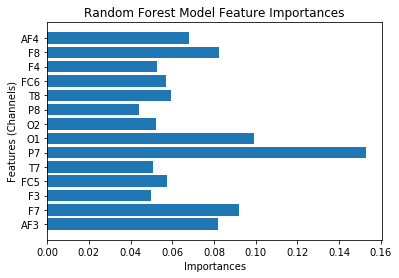

In [10]:
## VISUALIZE IMPORTANCES
plt.barh(X_train.columns,rf.feature_importances_)
plt.title('Random Forest Model Feature Importances')
plt.xlabel('Importances')
plt.ylabel('Features (Channels)')

In [11]:
## ORDERED LIST OF MOST IMPORTANT TO LEAST IMPORTANT FEATURES
import numpy as np
features = X_train.columns
importances = rf.feature_importances_
indices=np.argsort(importances)[::-1]
list(features[indices])

['P7',
 'O1',
 'F7',
 'F8',
 'AF3',
 'AF4',
 'T8',
 'FC5',
 'FC6',
 'F4',
 'O2',
 'T7',
 'F3',
 'P8']

In [12]:
## TRY USING SUBSET OF MORE USEFUL FEATURES

new_X_train = X_train[['P7','O1','F7','F8','AF3']]
new_X_test = X_test[['P7','O1','F7','F8','AF3']]

rf = RandomForestClassifier(class_weight='balanced').fit(new_X_train, y_train)
knn = KNeighborsClassifier().fit(new_X_train, y_train)
svm = SVC(class_weight='balanced').fit(new_X_train, y_train)

rf_predictions = rf.predict(new_X_test)
knn_predictions = knn.predict(new_X_test)
svm_predictions = svm.predict(new_X_test)

print('Random Forrest accuracy:',accuracy_score(y_test, rf_predictions))
print('K Nearest Neighbors accuracy:',accuracy_score(y_test, knn_predictions))
print('SVM accuracy:',accuracy_score(y_test, svm_predictions))

/Users/imannematollahi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/imannematollahi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forrest accuracy: 0.5243939858852409
K Nearest Neighbors accuracy: 0.45351334765265416
SVM accuracy: 0.5544645596808837


In [40]:
columns = ['AF3_std','AF3_mean','F7_std','F7_mean','F3_std','F3_mean','FC5_std','FC5_mean',
                        'T7_std','T7_mean','P7_std','P7_mean','O1_std','O1_mean','O2_std','O2_mean',
                        'P8_std','P8_mean','T8_std','T8_mean','FC6_std','FC6_mean','F4_std','F4_mean',
                        'F8_std','F8_mean','AF4_std','AF4_mean']

In [43]:
## TRY CHUNKING THE DATA INTO 10 ROW CHUNKS
## GET THE STANDARD DEVIATION AND MEAN OF EACH CHANNEL ACROSS 10 ROWS FOR EVERY NEW SAMPLE
chunked_open = pd.DataFrame()
for i in range(0,len(eye_open),10):
    chunk = eye_open[i:i+10]
    row = []
    for col in eye_open.columns[:-1]:
        std = chunk[col].std()
        mean = chunk[col].mean()
        row.append(std)
        row.append(mean)
    chunked_open = pd.concat([chunked_open, pd.DataFrame([row])])
chunked_open.columns = columns
chunked_open['eyeDetection']=0

chunked_closed = pd.DataFrame()
for i in range(0,len(eye_closed),10):
    chunk = eye_closed[i:i+10]
    row = []
    for col in eye_closed.columns[:-1]:
        std = chunk[col].std()
        mean = chunk[col].mean()
        row.append(std)
        row.append(mean)
    chunked_closed = pd.concat([chunked_closed, pd.DataFrame([row])])
chunked_closed.columns = columns
chunked_closed['eyeDetection']=1

In [57]:
 chunked_open.head()

,AF3_std,AF3_mean,F7_std,F7_mean,F3_std,F3_mean,FC5_std,FC5_mean,T7_std,T7_mean,...,T8_mean,FC6_std,FC6_mean,F4_std,F4_mean,F8_std,F8_mean,AF4_std,AF4_mean,eyeDetection
0,3.113380,4325.487,3.702939,4007.847,7.971885,4286.358,5.856945,4149.026,3.497822,4344.307,...,4231.487,5.692713,4207.077,6.999172,4278.719,4.835668,4630.258,6.612564,4389.383,0
0,4.370553,4311.284,4.216565,4000.768,5.094059,4254.462,4.238524,4125.332,2.751129,4339.950,...,4223.538,6.003505,4196.565,7.518978,4264.053,6.380762,4612.512,5.102060,4374.922,0
0,8.258998,4317.283,7.390927,4010.153,7.231584,4258.975,5.952204,4130.104,4.478323,4337.283,...,4231.845,11.079598,4202.564,7.024105,4266.410,12.912807,4620.307,13.884578,4380.410,0
0,5.330648,4308.565,5.197594,4002.873,6.053293,4257.487,2.912942,4122.309,4.059445,4334.205,...,4228.102,8.350475,4204.822,4.760596,4269.641,8.563932,4618.616,5.229192,4373.130,0
0,10.520408,4310.770,10.345986,4007.744,8.942679,4265.488,7.764772,4124.410,5.083271,4338.667,...,4229.025,12.076341,4208.103,11.018860,4272.872,13.861239,4621.487,15.769072,4373.231,0


In [45]:
## TAKE FIRST 75% OF EACH SET AS TRAINING, LAST 25% AS TEST
## -- MUST TRAIN/TEST LIKE THIS TO ENSURE MODEL ISNT PREDICTING OFF TIME SERIES

open_size = int(len(chunked_open)*.75)
open_train = chunked_open[:open_size]
open_test = chunked_open[open_size:]

closed_size = int(len(chunked_closed)*.75)
closed_train = chunked_closed[:closed_size]
closed_test = chunked_closed[closed_size:]

training = open_train.append(closed_train)
testing = open_test.append(closed_test)

In [46]:
## ASSIGN TRAIN AND TEST VARIABLES
## -- FOR BASELINE USE ALL 14 CHANNELS

X_train = training.drop('eyeDetection',axis=1)
y_train = training['eyeDetection']

X_test = testing.drop('eyeDetection',axis=1)
y_test = testing['eyeDetection']

In [47]:
## TRYING DIFFERENT MODELS
## -- RANDOM FOREST, KNN, SVM

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)

/Users/imannematollahi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/imannematollahi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
## COMPARE MODEL PERFORMANCES

from sklearn.metrics import accuracy_score
print('Random Forrest accuracy:',accuracy_score(y_test, rf_predictions))
print('K Nearest Neighbors accuracy:',accuracy_score(y_test, knn_predictions))
print('SVM accuracy:',accuracy_score(y_test, svm_predictions))

Random Forrest accuracy: 0.5963302752293578
K Nearest Neighbors accuracy: 0.5535168195718655
SVM accuracy: 0.5504587155963303


Text(0, 0.5, 'Features (Channels)')

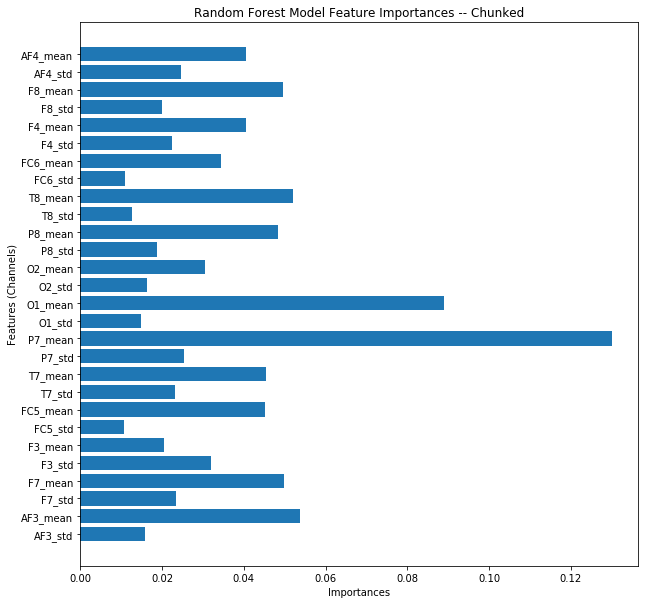

In [56]:
plt.figure(figsize=(10,10))
plt.barh(X_train.columns,rf.feature_importances_)
plt.title('Random Forest Model Feature Importances -- Chunked')
plt.xlabel('Importances')
plt.ylabel('Features (Channels)')

In [67]:
import scipy as sp
from scipy import signal
import seaborn as sns

eye_open.resample('1000ms')
#df2_resample_lst = [explode_extended(df).resample(size, on='Time').sum() * mbit_rate for df in df2]

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [47]:
import pywt
(cA, cD) = pywt.dwt(df['AF3'], 'db1')

In [79]:
features = pd.DataFrame()
for i in range(0,len(eye_open),10):
    chunk = eye_open[i:i+10]
    row = []
    for col in eye_open.columns:
        (cA, cD) = pywt.dwt(chunk[col], 'db1')
        row.append(list(cA))
    features = pd.concat([features, pd.DataFrame([row])])
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"[6119.1960183712035, 6121.006211731043, 6114.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[6119.1960183712035, 6121.006211731043, 6114.4...","[5666.647678411814, 5669.907440673085, 5668.45...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[6119.1960183712035, 6121.006211731043, 6114.4...","[5666.647678411814, 5669.907440673085, 5668.45...","[6069.154071466633, 6075.312971530768, 6064.43...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[6119.1960183712035, 6121.006211731043, 6114.4...","[5666.647678411814, 5669.907440673085, 5668.45...","[6069.154071466633, 6075.312971530768, 6064.43...","[5866.8154660301025, 5877.690768324751, 5872.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[6119.1960183712035, 6121.006211731043, 6114.4...","[5666.647678411814, 5669.907440673085, 5668.45...","[6069.154071466633, 6075.312971530768, 6064.43...","[5866.8154660301025, 5877.690768324751, 5872.2...","[6146.39134517564, 6138.047485157638, 6147.112...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[6119.55664282961, 6121.37390725726, 6107.9530...","[5711.6055275596555, 5709.434709741412, 5703.9...","[6053.555295873658, 6053.201742483065, 6049.56...","[5865.726521587076, 5870.796477208182, 5869.70...","[6133.698778453341, 6136.237291797801, 6130.43...","[6514.808120309454, 6528.58963147478, 6524.601...","[5754.760254415471, 5762.736418907254, 5766.00...","[6539.832629295646, 6541.282198197079, 6540.20...","[5949.851015344839, 5947.312502000379, 5941.15...","[5988.649964428545, 5985.022506641058, 5982.12...","[5944.045668671297, 5936.430128637918, 5932.80...",NaN,NaN,NaN,NaN
0,"[6119.55664282961, 6121.37390725726, 6107.9530...","[5711.6055275596555, 5709.434709741412, 5703.9...","[6053.555295873658, 6053.201742483065, 6049.56...","[5865.726521587076, 5870.796477208182, 5869.70...","[6133.698778453341, 6136.237291797801, 6130.43...","[6514.808120309454, 6528.58963147478, 6524.601...","[5754.760254415471, 5762.736418907254, 5766.00...","[6539.832629295646, 6541.282198197079, 6540.20...","[5949.851015344839, 5947.312502000379, 5941.15...","[5988.649964428545, 5985.022506641058, 5982.12...","[5944.045668671297, 5936.430128637918, 5932.80...","[6069.507624857226, 6072.413833727902, 6065.15...",NaN,NaN,NaN
0,"[6119.55664282961, 6121.37390725726, 6107.9530...","[5711.6055275596555, 5709.434709741412, 5703.9...","[6053.555295873658, 6053.201742483065, 6049.56...","[5865.726521587076, 5870.796477208182, 5869.70...","[6133.698778453341, 6136.237291797801, 6130.43...","[6514.808120309454, 6528.58963147478, 6524.601...","[5754.760254415471, 5762.736418907254, 5766.00...","[6539.832629295646, 6541.282198197079, 6540.20...","[5949.851015344839, 5947.312502000379, 5941.15...","[5988.649964428545, 5985.022506641058, 5982.12...","[5944.045668671297, 5936.430128637918, 5932.80...","[6069.507624857226, 6072.413833727902, 6065.15...","[6538.743684852618, 6537.654740409593, 6530.76...",NaN,NaN
0,"[6119.55664282961, 6121.37390725726, 6107.9530...","[5711.6055275596555, 5709.434709741412, 5703.9...","[6053.555295873658, 6053.201742483065, 6049.56...","[5865.726521587076, 5870.796477208182, 5869.70...","[6133.698778453341, 6136.237291797801, 6130.43...","[6514.808120309454, 6528.58963147478, 6524.601...","[5754.760254415471, 5762.736418907254, 5766.00...","[6539.832629295646, 6541.282198197079, 6540.20...","[5949.851015344839, 5947.312502000379, 5941.15...","[5988.649964428545, 5985.022506641058, 5982.12...","[5944.045668671297, 5936.430128637918, 5932.80...","[6069.507624857226, 6072.413833727902, 6065.15...","[6538.743684852618, 6537.654740409593, 6530.76...","[6203.681136587374, 6194.976652110967, 6189.17...",NaN


In [82]:
features.reset_index(drop=True)[1000:1006]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1000,"[6006.780182298167, 6010.76826454406, 5999.525...","[5612.978273719755, 5611.528704818324, 5615.87...","[6006.419557839762, 6005.691237855141, 5994.44...","[5793.198579040771, 5797.186661286663, 5800.81...","[6128.621751764422, 6132.242138484096, 6131.88...","[6549.258362688863, 6556.5132782638375, 6555.4...","[5797.186661286663, 5798.27560572969, 5801.903...","[6526.051118130321, 6546.719849344403, 6551.79...","[5951.300584246272, 5962.904206525542, 5964.35...","[5973.0582599033805, 5983.5800088074375, 5982....","[5936.797824164135, 5947.312502000379, 5934.25...",NaN,NaN,NaN,NaN
1001,"[6006.780182298167, 6010.76826454406, 5999.525...","[5612.978273719755, 5611.528704818324, 5615.87...","[6006.419557839762, 6005.691237855141, 5994.44...","[5793.198579040771, 5797.186661286663, 5800.81...","[6128.621751764422, 6132.242138484096, 6131.88...","[6549.258362688863, 6556.5132782638375, 6555.4...","[5797.186661286663, 5798.27560572969, 5801.903...","[6526.051118130321, 6546.719849344403, 6551.79...","[5951.300584246272, 5962.904206525542, 5964.35...","[5973.0582599033805, 5983.5800088074375, 5982....","[5936.797824164135, 5947.312502000379, 5934.25...","[6042.319369120603, 6052.46635143063, 6035.071...",NaN,NaN,NaN
1002,"[6006.780182298167, 6010.76826454406, 5999.525...","[5612.978273719755, 5611.528704818324, 5615.87...","[6006.419557839762, 6005.691237855141, 5994.44...","[5793.198579040771, 5797.186661286663, 5800.81...","[6128.621751764422, 6132.242138484096, 6131.88...","[6549.258362688863, 6556.5132782638375, 6555.4...","[5797.186661286663, 5798.27560572969, 5801.903...","[6526.051118130321, 6546.719849344403, 6551.79...","[5951.300584246272, 5962.904206525542, 5964.35...","[5973.0582599033805, 5983.5800088074375, 5982....","[5936.797824164135, 5947.312502000379, 5934.25...","[6042.319369120603, 6052.46635143063, 6035.071...","[6479.27600455483, 6489.062362406452, 6484.713...",NaN,NaN
1003,"[6006.780182298167, 6010.76826454406, 5999.525...","[5612.978273719755, 5611.528704818324, 5615.87...","[6006.419557839762, 6005.691237855141, 5994.44...","[5793.198579040771, 5797.186661286663, 5800.81...","[6128.621751764422, 6132.242138484096, 6131.88...","[6549.258362688863, 6556.5132782638375, 6555.4...","[5797.186661286663, 5798.27560572969, 5801.903...","[6526.051118130321, 6546.719849344403, 6551.79...","[5951.300584246272, 5962.904206525542, 5964.35...","[5973.0582599033805, 5983.5800088074375, 5982....","[5936.797824164135, 5947.312502000379, 5934.25...","[6042.319369120603, 6052.46635143063, 6035.071...","[6479.27600455483, 6489.062362406452, 6484.713...","[6132.970458468719, 6142.7638873881515, 6131.8...",NaN
1004,"[6006.780182298167, 6010.76826454406, 5999.525...","[5612.978273719755, 5611.528704818324, 5615.87...","[6006.419557839762, 6005.691237855141, 5994.44...","[5793.198579040771, 5797.186661286663, 5800.81...","[6128.621751764422, 6132.242138484096, 6131.88...","[6549.258362688863, 6556.5132782638375, 6555.4...","[5797.186661286663, 5798.27560572969, 5801.903...","[6526.051118130321, 6546.719849344403, 6551.79...","[5951.300584246272, 5962.904206525542, 5964.35...","[5973.0582599033805, 5983.5800088074375, 5982....","[5936.797824164135, 5947.312502000379, 5934.25...","[6042.319369120603, 6052.46635143063, 6035.071...","[6479.27600455483, 6489.062362406452, 6484.713...","[6132.970458468719, 6142.7638873881515, 6131.8...","[0.0, 0.0, 0.0, 0.0, 0.0]"
1005,"[5996.993824446545, 5995.904880003518, 6003.88...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# CHECK IF DATASET IS BALANCED
df['eyeDetection'].value_counts()

0    8257
1    6723
Name: eyeDetection, dtype: int64

In [3]:
# CHECK IF DATATYPES ARE CORRECT
df.dtypes

AF3             float64
F7              float64
F3              float64
FC5             float64
T7              float64
P7              float64
O1              float64
O2              float64
P8              float64
T8              float64
FC6             float64
F4              float64
F8              float64
AF4             float64
eyeDetection      int64
dtype: object

In [4]:
# SPLIT DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X = df.drop('eyeDetection', axis=1)
y = df.eyeDetection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
training = X_train
training['eyeDetection'] = y_train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
print(y.value_counts())

0    8257
1    6723
Name: eyeDetection, dtype: int64


In [6]:
# CHECK THAT DATASETS ARE BALANCED
print(y_train.value_counts())
print(y_test.value_counts())

0    5780
1    4706
Name: eyeDetection, dtype: int64
0    2477
1    2017
Name: eyeDetection, dtype: int64


In [7]:
# UPSAMPLE THE MINORITY LABEL
from sklearn.utils import resample
df_majority = training[training.eyeDetection==0]
df_minority = training[training.eyeDetection==1]
# df_majority.shape[0]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.eyeDetection.value_counts()

1    5780
0    5780
Name: eyeDetection, dtype: int64

In [8]:
# SET X AND Y
X = df_upsampled.drop('eyeDetection', axis=1)
y = df_upsampled.eyeDetection

In [ ]:
# BASELINE MODEL
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression().fit(X_train, y_train)
# predictions = model.predict(X_test)

In [9]:
# IMPROVED MODEL
from sklearn.ensemble import RandomForestClassifier
fitted_model = RandomForestClassifier(class_weight='balanced').fit(X, y)
predictions = fitted_model.predict(X_test)

In [10]:
# MODEL OUTPUT
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [11]:
# 1ST PERFORMANCE METRIC
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9216733422340899


In [14]:
# FEATURE SELECTION
from sklearn.feature_selection import RFE
forest = RandomForestClassifier(class_weight='balanced')
rfe = RFE(forest)
rfe = rfe.fit(X_train.drop('eyeDetection', axis=1), y_train.values.ravel())
print(X_train.drop('eyeDetection', axis=1).columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4'],
      dtype='object')
[ True  True False False False  True  True False False False  True False
  True  True]
[1 1 7 3 6 1 1 5 8 4 1 2 1 1]


In [15]:
X_finaltrain = training[['AF3', 'F7', 'P7', 'O1', 'FC6', 'F8', 'AF4']]
y_finaltrain = training.eyeDetection
X_finaltest = X_test[['AF3', 'F7', 'P7', 'O1', 'FC6', 'F8', 'AF4']]
y_finaltest = y_test

final_model = RandomForestClassifier(class_weight='balanced').fit(X_finaltrain, y_finaltrain)
predictions = final_model.predict(X_finaltest)

In [16]:
print(accuracy_score(y_finaltest, predictions))

0.8909657320872274


In [ ]:
---------------------------------------------------------------------------------------------------------

In [ ]:
# RESAMPLING (doesn't work because library is not installed)
from imblearn.over_sampling import SMOTE
smote = SMOTE()#random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=0)
columns = X_train.columns
new_data_X, new_data_y = smote.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=new_data_X, columns=columns)
os_data_y= pd.DataFrame(data=new_data_y, columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['y']==0]))
print("Number of subscription", len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ", len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ", len(os_data_y[os_data_y['y']==1])/len(os_data_X))